In [3]:
import praw
import pandas as pd

import credentials

# Create your Reddit account and API keys

First, I import my Reddit API client ID and client secret saved on a 'credentials.py' file using the 'praw' library.     

In [4]:
reddit = praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)

# Collect data from a subreddit of your choice

Then, I collect the title, link, author, number of columns, score, and the text of the Education subreddit, and save it in a dataframe.

In [5]:
reddit_data = {'title': [],
              'link': [],
              'author': [],
              'n_comments': [],
              'score': [],
              'text': []}


edu_subreddit = reddit.subreddit('education').hot(limit=None)

for post in list(edu_subreddit):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    
    reddit_data['n_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)
    reddit_data['text'].append(post.selftext)

In [6]:
edu_df = pd.DataFrame(reddit_data)

In [8]:
edu_df

,title,link,author,n_comments,score,text
0,Welcome to r/Education! Please read before pos...,/r/education/comments/b5bbjr/welcome_to_reduca...,Asclepias_metis,0,103,# Please review our rules about conduct and su...
1,what are the beat countries to study abroad fo...,/r/education/comments/1es2fbn/what_are_the_bea...,Ambitious-Taro-5303,3,3,I’m a 17-year-old female currently in high sch...
2,Credit Recovery / Bad Grades,/r/education/comments/1es4itg/credit_recovery_...,Classic_Yam_8885,0,0,I didn't do well in some of my classes early o...
3,Frustrated,/r/education/comments/1erwc4y/frustrated/,Top-Ticket-4899,1,3,I just moved from CA to NV. I am getting frus...
4,Pilot study on music - seeking volunteers,/r/education/comments/1es0x04/pilot_study_on_m...,Ok-Interaction-8989,0,1,Hi \nI'm seeking volunteers to participate in ...
...,...,...,...,...,...,...
284,I'm building a website with live virtual lectu...,/r/education/comments/1dkn220/im_building_a_we...,campuschats,1,3,Hi everyone! I'm launching a website that offe...
285,should i take a NYS regents if i know i’m goin...,/r/education/comments/1dkkczg/should_i_take_a_...,kittysoups,5,1,Should I just skip going to the geometry regen...
286,A Highly Effective Study Aid,/r/education/comments/1dkndxi/a_highly_effecti...,Novel-Tumbleweed-447,0,0,I have contrived a formula which increases foc...
287,How do educational institutions get their apps?,/r/education/comments/1dkeops/how_do_education...,PoseidonGamer26,3,1,I was wondering where do institutions like sch...


# Create a plot of the word count

Finally, I perform some EDA and create a plot from the data. First, I want to find the most used words in a reddit post title. I cleaned the words in a title by eliminating the most common english stopwords and some other unnecessary words.

In [10]:
import nltk

In [11]:
from nltk.corpus import stopwords

stops = stopwords.words('english')
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
stops = set(stops) | set(['-', "vs", 'like', 'teachers', 'going', 'university', 'universities', 'take', 'educational', 'education', 'school', 'would', 'get', 'student', 'students', 'need', 'anyone', '?', 'schools', 'study', 'year'])

In [42]:
words = ' '.join(edu_df['title']).lower().split()
cleaned_words = [w for w in words if w not in set(stops)]

In [43]:
cleaned_fd = nltk.FreqDist(cleaned_words)
cleaned_fd.most_common(20)

[('help', 14),
 ('online', 13),
 ('high', 12),
 ('job', 9),
 ('teaching', 8),
 ('degree', 8),
 ('learning', 7),
 ('us', 6),
 ('system', 6),
 ('masters', 6),
 ('advice', 6),
 ('teacher', 6),
 ('recommendations', 5),
 ('research', 5),
 ('i’m', 5),
 ('tools', 5),
 ('change', 5),
 ('music', 4),
 ('health', 4),
 ('programs', 4)]

It can be inferred that most posts made in the Mongolia subreddit are asking advices.

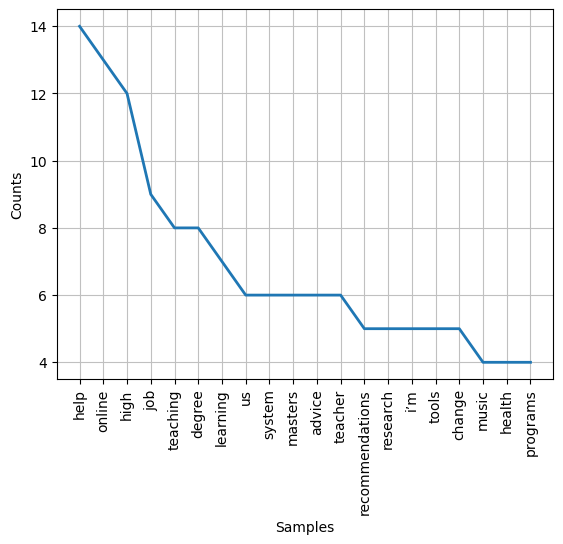

<Axes: xlabel='Samples', ylabel='Counts'>

In [44]:
cleaned_fd.plot(20)

# Extract the sentiment scores using keywords sentiment analysis method

In [46]:
sentiment_df = pd.read_csv('AFINN-en-165.txt', sep='\t', names=['word', 'score'], index_col='word')
sentiment_df

,score
word,
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
...,...
yucky,-2
yummy,3
zealot,-2


In [47]:
sentiment_dict = sentiment_df.to_dict()['score']

In [49]:
import numpy as np

title_sentiments = []
for title in edu_df['title']:
    words = title.lower().split()
    this_titles_sentiments = []
    for w in words:
        if w in sentiment_dict.keys():
            this_titles_sentiments.append(sentiment_dict[w])
        else:
            this_titles_sentiments.append(0)
            
    
    title_sentiments.append(np.mean(this_titles_sentiments))

In [50]:
edu_df['keyword_sentiment'] = title_sentiments

# Examine the text for some of the highest and lowest sentiment scores

In [51]:
edu_df.sort_values(by='keyword_sentiment')[['title', 'keyword_sentiment']]

,title,keyword_sentiment
271,Lost,-3.000000
3,Frustrated,-2.000000
16,I hated college,-1.000000
133,major anxiety over past mistakes,-0.800000
2,Credit Recovery / Bad Grades,-0.600000
...,...,...
28,help with my future,0.500000
20,Is it worth it?,0.500000
121,Interested in helping stray animals as a passi...,0.555556
48,Best ed policy TikTok/Instagram accounts?,0.600000


In [53]:
edu_df.sort_values(by='keyword_sentiment')['title'].to_list()[:10]

['Lost ',
 'Frustrated ',
 'I hated college ',
 'major anxiety over past mistakes',
 'Credit Recovery / Bad Grades',
 'dropped out',
 'Marjorie Stamberg Protests Gag Order, Speaks Up for Palestinians',
 'How to counter hate speech worldwide ?',
 'Lack of problem solving skills is concerning. ',
 'Higher Education is Dead and effectively Worthless ']

In [54]:
edu_df.sort_values(by='keyword_sentiment', ascending=False)['title'].to_list()[:10]

['Help pls pls',
 'Best ed policy TikTok/Instagram accounts?',
 'Interested in helping stray animals as a passion project',
 'Is it worth it?',
 'Interested in Ed. research?',
 'A Remarkable School-Choice Experiment',
 'Best Interactive tools for online teaching',
 'Famous jumping off point',
 'HELP IN CHOOSING UNIVERSITY ',
 'help with my future ']